# Spotify Hit Predictor model for 70's Dataset

### Load Libraries

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import tensorflow as tf
import joblib
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline
import matplotlib as mpl #add'l plotting functionality

mpl.rcParams['figure.dpi'] = 400 #high res figures
plt.style.use('dark_background')

### Load Dataset

In [2]:
df = pd.read_csv('dataset-of-70s.csv')
df.head

<bound method NDFrame.head of                               track                 artist  \
0                           Porque?        Reginaldo Rossi   
1                         Free Jazz   Maria Teresa Luciani   
2                 Reject of Society                  Crass   
3                            Yeah !               The Jets   
4                  Gotta Find A Way            The Moments   
...                             ...                    ...   
7761            Born with the Blues          Buster Benton   
7762       Farther On Down The Road              Joe Simon   
7763                     Sweetheart  Engelbert Humperdinck   
7764  Until It's Time For You To Go           Neil Diamond   
7765  Try Me, I Know We Can Make It           Donna Summer   

                                       uri  danceability  energy  key  \
0     spotify:track:28KC2wl7jDv6Ms1Uc0OMpm         0.669   0.547    1   
1     spotify:track:0zagn8PNnM7pM8pz1gXOAD         0.291   0.300    1   
2     

In [3]:
df.shape

(7766, 19)

7766 smaples having 19 features.

### Shuffle The Data

In [4]:
df = df.sample(frac = 1)

### Balance The Dataset


#### Dropping Categorical features

In [5]:
X = df.drop(['target', 'track', 'artist', 'uri'], axis=1)

In [6]:
X.shape

(7766, 15)

Modified dataframe X


In [7]:
Y = df['target']

Now lets check if hits and flops counts are balanced

In [8]:
hit_flop_count = Y.value_counts()

In [9]:
hit_flop_count

1    3883
0    3883
Name: target, dtype: int64

We observe that dataset target values of hits and flops are well balanced.i.e, equal.

In [10]:
Y = Y.values

### Standardize The Inputs

In [11]:
scaler = StandardScaler()
scaled_X = scaler.fit_transform(X)

### Split The Dataset into Train,Validation and Test

Training and Testing split (ratio of 90% to 10% respectively)

In [12]:
x_train, x_test, y_train, y_test = train_test_split(scaled_X, Y, test_size=0.1, random_state=1)

Training and Validation split

In [13]:
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=(1/9), random_state=1)

In [14]:
x_train.shape, x_test.shape, x_val.shape

((6212, 15), (777, 15), (777, 15))

### Create The Deep Learning Algorithm

Using standard notations used globally for training neural networks

In [15]:
nn = 200 #number of neurons in hidden layers
target_count = 2

In [16]:
model_70 = tf.keras.Sequential()
model_70.add(tf.keras.layers.Flatten())

In [17]:
model_70.add(tf.keras.layers.Dense(nn, activation=tf.nn.relu))# first hidden  layer
model_70.add(tf.keras.layers.Dense(nn, activation=tf.nn.relu))# second hidden layer
model_70.add(tf.keras.layers.Dense(nn, activation=tf.nn.relu))# third hidden layer

In [18]:
model_70.add(tf.keras.layers.Dense(target_count, activation=tf.nn.softmax))# output layer

In [19]:
model_70.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

#### Fitting the model

In [20]:
model_fit = model_70.fit(x_train, y_train, epochs=20, validation_data=(x_val, y_val), batch_size=100)

Epoch 1/20
63/63 [==============================] - 1s 8ms/step - loss: 0.5456 - accuracy: 0.7147 - val_loss: 0.5147 - val_accuracy: 0.7580
Epoch 2/20
63/63 [==============================] - 0s 4ms/step - loss: 0.4974 - accuracy: 0.7564 - val_loss: 0.5041 - val_accuracy: 0.7503
Epoch 3/20
63/63 [==============================] - 0s 4ms/step - loss: 0.4782 - accuracy: 0.7672 - val_loss: 0.5172 - val_accuracy: 0.7529
Epoch 4/20
63/63 [==============================] - 0s 4ms/step - loss: 0.4690 - accuracy: 0.7743 - val_loss: 0.5246 - val_accuracy: 0.7529
Epoch 5/20
63/63 [==============================] - 0s 4ms/step - loss: 0.4535 - accuracy: 0.7824 - val_loss: 0.5042 - val_accuracy: 0.7542
Epoch 6/20
63/63 [==============================] - 0s 4ms/step - loss: 0.4428 - accuracy: 0.7922 - val_loss: 0.5026 - val_accuracy: 0.7580
Epoch 7/20
63/63 [==============================] - 0s 4ms/step - loss: 0.4363 - accuracy: 0.7920 - val_loss: 0.5308 - val_accuracy: 0.7207
Epoch 8/20
63/63 [==

In [21]:
#Storing the predictions
predictions = model_70.predict(x_test)

### Visualize Neural Network Loss History

#### Loss Variation Plot

In [22]:
training_loss = model_fit.history['loss']
validation_loss = model_fit.history['val_loss']
epoch_count1 = range(1, len(training_loss) + 1)

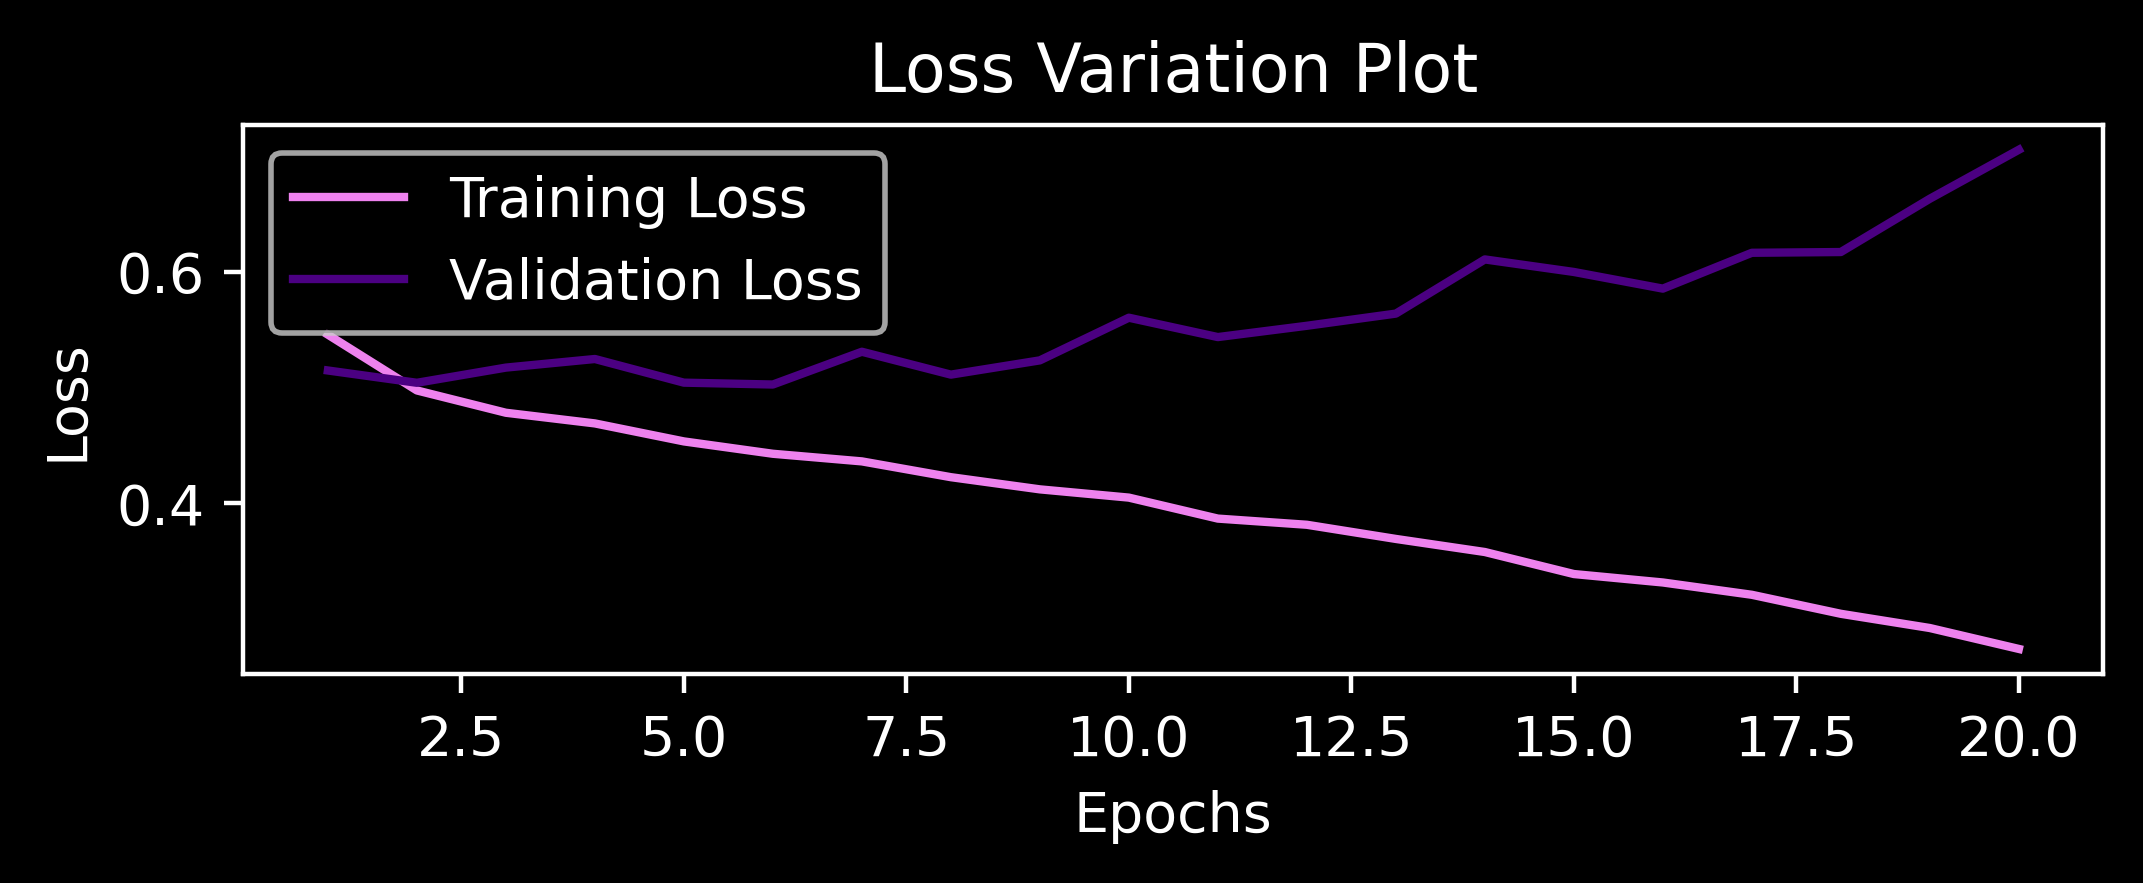

In [23]:
plt.subplot(2,1,2)
plt.title('Loss Variation Plot')
plt.plot(epoch_count1, training_loss, color='violet', label='Training Loss')
plt.plot(epoch_count1, validation_loss, color='indigo', label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

#### Accuracy Variation Plot

In [24]:
training_acc = model_fit.history['accuracy']
validation_acc = model_fit.history['val_accuracy']
epoch_count2 = range(1, len(training_acc) + 1)

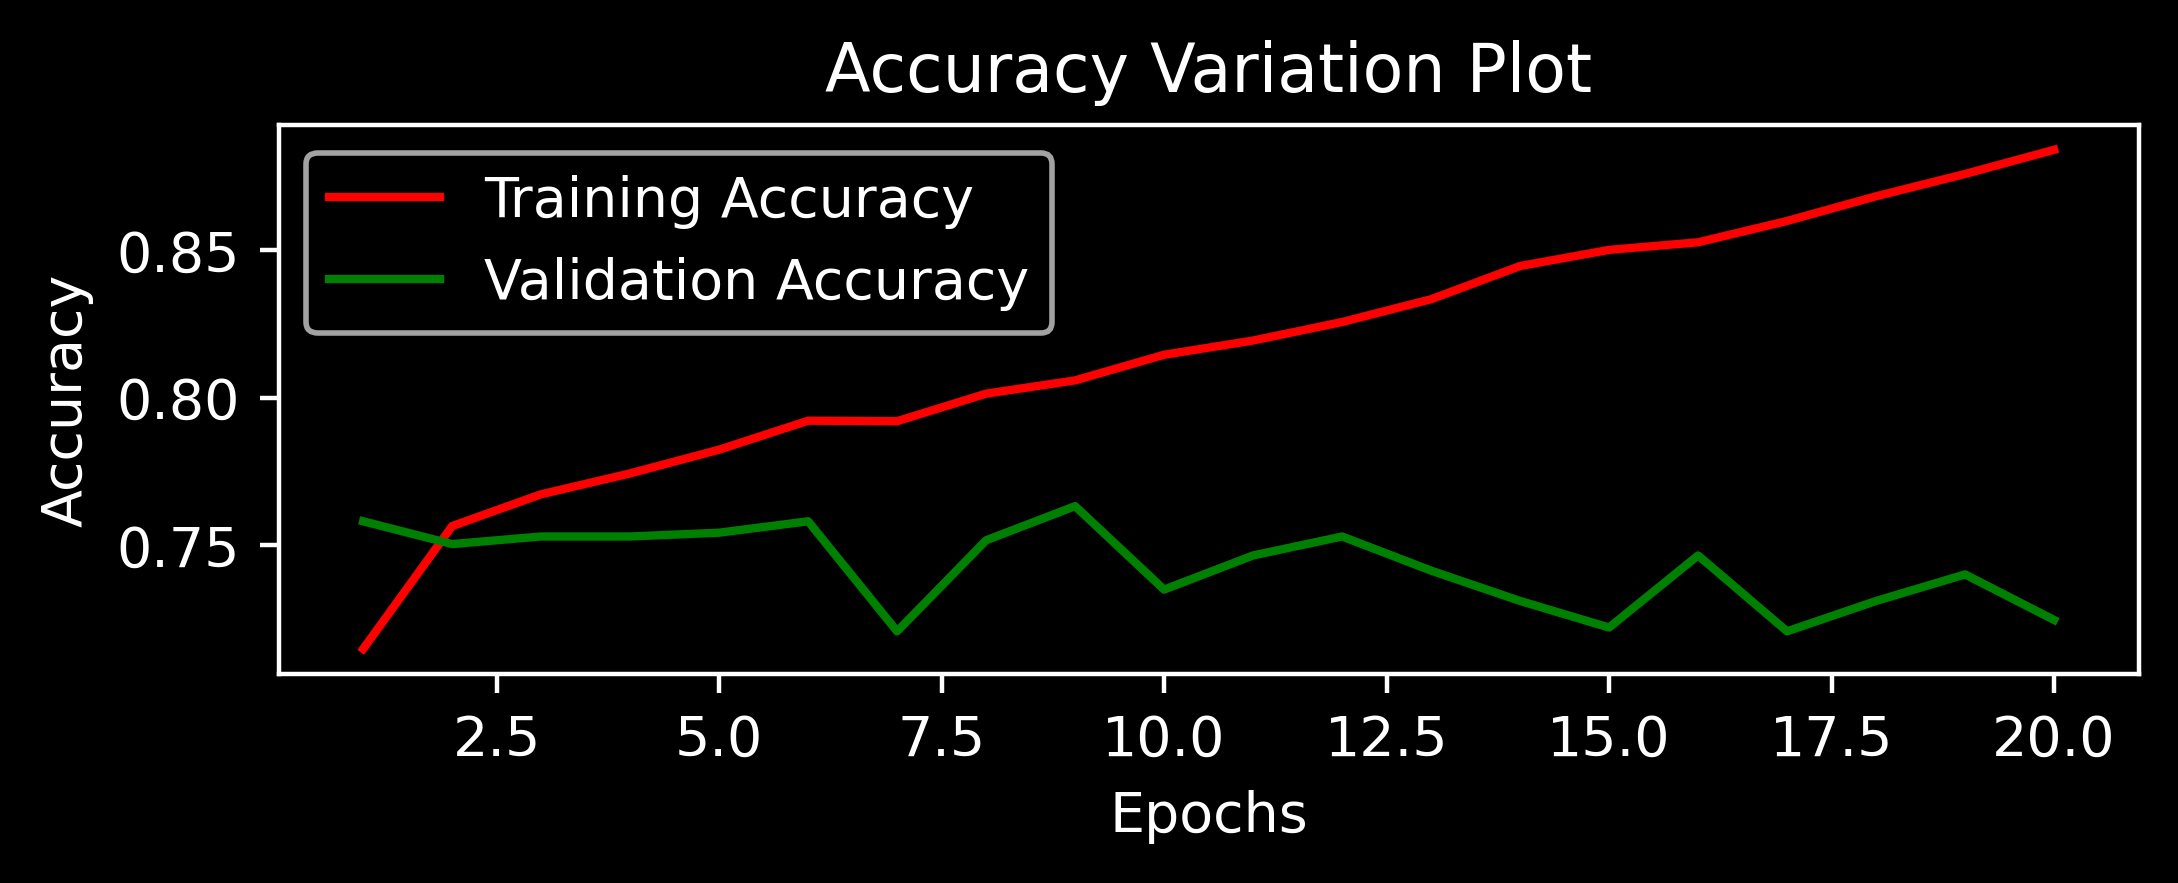

In [25]:
plt.subplot(2,1,2)
plt.title('Accuracy Variation Plot')
plt.plot(epoch_count2, training_acc, color='red', label='Training Accuracy')
plt.plot(epoch_count2, validation_acc, color='green', label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

### Test The Model

In [26]:
print(predictions[215])
print('Predicted:', np.argmax(predictions[215]))
print('Original:', y_test[215])

[0.06582894 0.9341711 ]
Predicted: 1
Original: 0


### Saving model and Verifying

In [27]:
model_70.save('Trained_model_70')

Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: Trained_model_70\assets


In [28]:
model = tf.keras.models.load_model('Trained_model_70')
print(x_test[1])

[-1.49564655 -1.49887615 -0.34482205 -1.07185698 -1.61153209 -0.4604331
  1.44879984 -0.5298969  -0.51959432 -1.65290471 -0.6896667  -0.45463689
  0.26864066 -0.93119567 -0.48938711]


In [29]:
print(x_test[1].reshape( 1,-1))

[[-1.49564655 -1.49887615 -0.34482205 -1.07185698 -1.61153209 -0.4604331
   1.44879984 -0.5298969  -0.51959432 -1.65290471 -0.6896667  -0.45463689
   0.26864066 -0.93119567 -0.48938711]]


In [30]:
v = model.predict(x_test[1].reshape( 1,-1))
print(v)

[[0.9840995  0.01590047]]
